**Doug Marcum  
DSC 630 - Assignment 3.3 - Using Data to Improve a Marketing Promotion**  

a. For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date (Jan 1, 2020) or if you want to recommend a day of the week (Tuesdays) or Month and day of the week (July Tuesdays). You will want to use TRAIN. As a reminder, the training set is the data we fit our model on. Use a combination of R and Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following: **Box plots, Scatter plots , Regression Model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data downloaded from http://content.bellevue.edu/cst/dsc/630/dodgers.csv, hard copy for future ref
dodgers = pd.read_csv('http://content.bellevue.edu/cst/dsc/630/dodgers.csv')
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
# summary of the data
dodgers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [4]:
# run through objects to find all unique entries, check for duplicates due to typos
print("Months:", dodgers['month'].unique())
print("Days of the Week:", dodgers['day_of_week'].unique())
print("Opponents:", dodgers['opponent'].unique())
print("Skies:", dodgers['skies'].unique())
print("Day or Night:", dodgers['day_night'].unique())
print("Cap Day:", dodgers['cap'].unique())
print("Shirt Day:", dodgers['shirt'].unique())
print("Fireworks:", dodgers['fireworks'].unique())
print("Bobbleheads:", dodgers['bobblehead'].unique())

# from this we can see there is a space after Clear and the Diamondbacks are listed as Snakes

Months: ['APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT']
Days of the Week: ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
Opponents: ['Pirates' 'Padres' 'Braves' 'Nationals' 'Giants' 'Rockies' 'Snakes'
 'Cardinals' 'Astros' 'Brewers' 'Angels' 'White Sox' 'Mets' 'Reds'
 'Phillies' 'Cubs' 'Marlins']
Skies: ['Clear ' 'Cloudy']
Day or Night: ['Day' 'Night']
Cap Day: ['NO' 'YES']
Shirt Day: ['NO' 'YES']
Fireworks: ['NO' 'YES']
Bobbleheads: ['NO' 'YES']


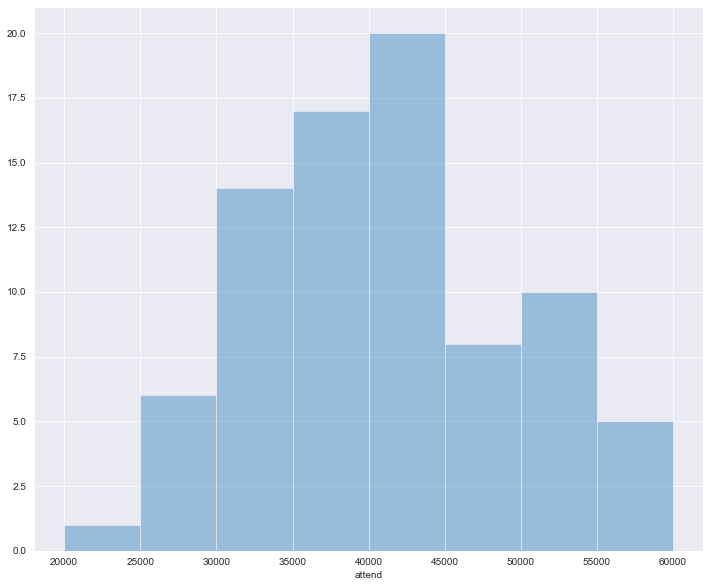

In [5]:
# plot histogram to check distribution of attendance
# set fig size and style
plt.rcParams['figure.figsize'] = [12, 10]
sns.set_style("darkgrid")

bins = [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]
sns.distplot(dodgers.attend, kde = False, bins = bins)
plt.xticks(bins)
plt.show()

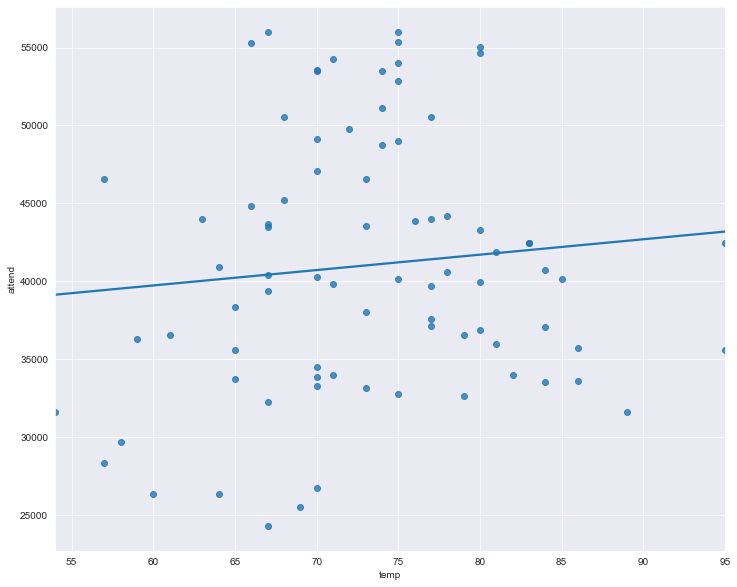

In [6]:
# scatter plot with regression line of temperatures and attendance
sns.regplot(x = 'temp', y = 'attend', data = dodgers, ci = None)
plt.show()

In [7]:
# average temps and attendance by month
x = {'temp':'avg_temp', 'attend':'avg_attend'}
temp_df = dodgers.groupby('month').agg({'temp':'mean', 'attend':'mean'}).rename(columns=x).sort_values('avg_temp')
temp_df

,avg_temp,avg_attend
month,,
APR,63.000000,39591.916667
MAY,68.555556,37345.722222
JUN,70.555556,47940.444444
JUL,73.166667,43884.250000
AUG,77.333333,42751.533333
OCT,83.666667,36703.666667
SEP,84.250000,38955.083333


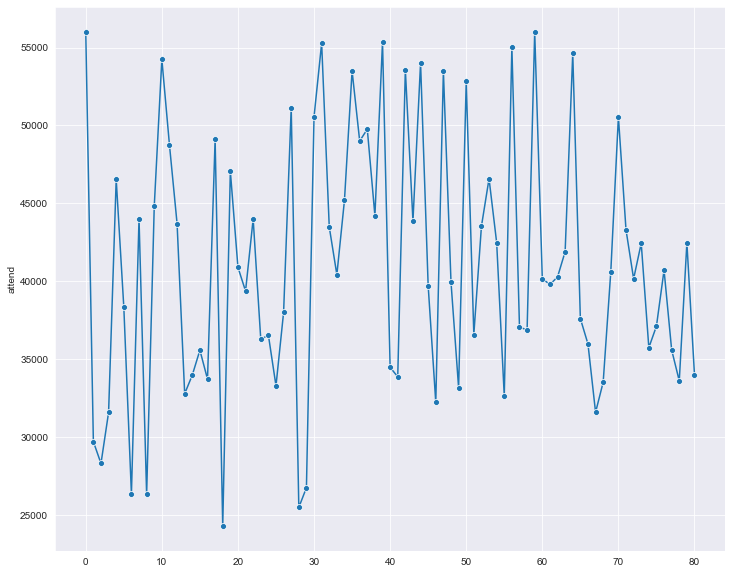

In [8]:
# line chart of attendance from game to game
sns.lineplot(x = dodgers.index, y = 'attend', data=dodgers, marker="o")
plt.show()

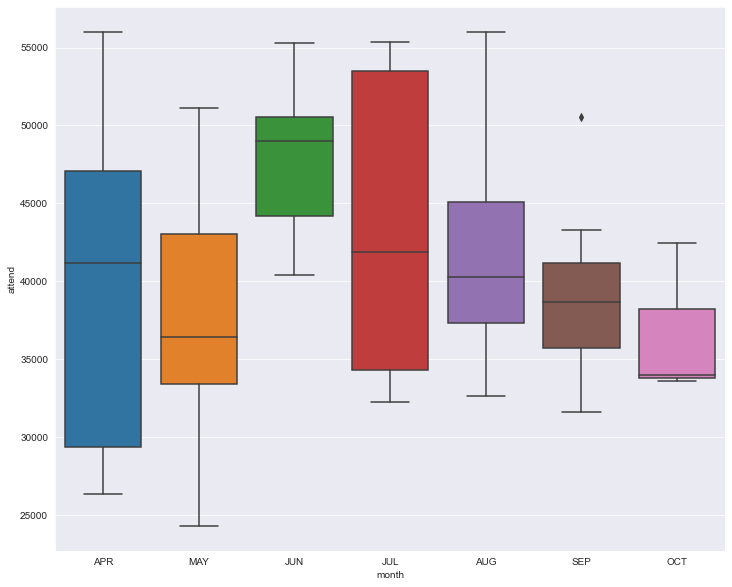

In [9]:
# box plot of attendance by month
sns.boxplot(x = 'month', y = 'attend', data = dodgers)
plt.show()

In [10]:
dodgers.groupby('month').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
OCT,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0
MAY,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
SEP,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0
APR,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
AUG,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
JUL,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
JUN,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0


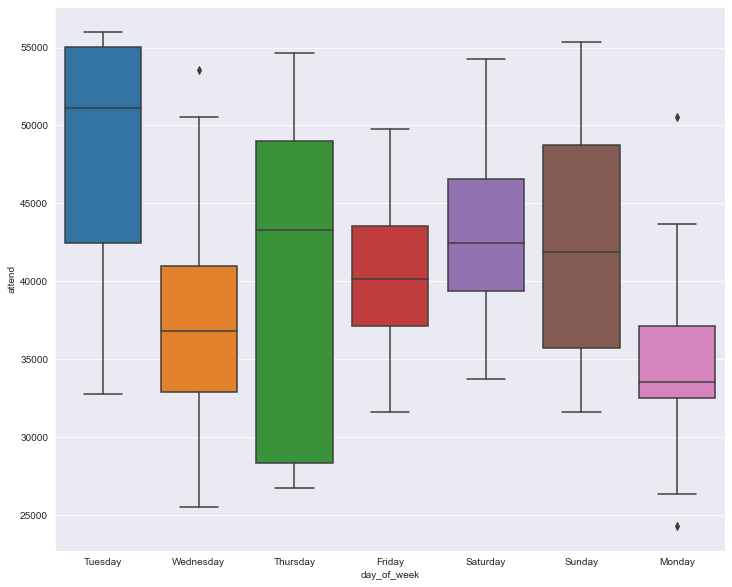

In [11]:
# box plot of attendance by day
sns.boxplot(x = 'day_of_week', y = 'attend', data = dodgers)
plt.show()

In [12]:
dodgers.groupby('day_of_week').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Monday,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0
Wednesday,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0
Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
Sunday,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
Saturday,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0
Tuesday,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0


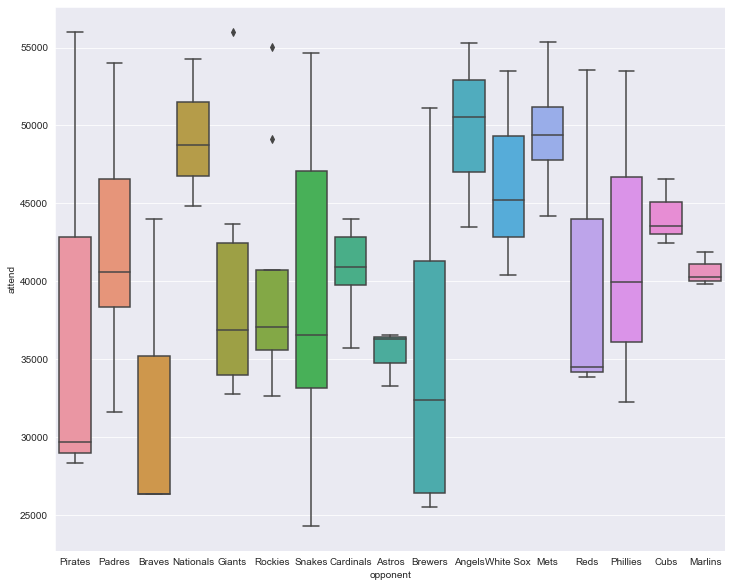

In [13]:
# box plot of attendance by opponent
sns.boxplot(x = 'opponent', y = 'attend', data = dodgers)
plt.show()

In [14]:
dodgers.groupby('opponent').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
opponent,,,,,,,,
Braves,3.0,32245.000000,10192.264763,26345.0,26360.50,26376.0,35195.00,44014.0
Brewers,4.0,35358.750000,11926.816127,25509.0,26457.00,32394.5,41296.25,51137.0
Astros,3.0,35383.333333,1804.385306,33306.0,34794.50,36283.0,36422.00,36561.0
Pirates,3.0,38019.000000,15587.750672,28328.0,29028.50,29729.0,42864.50,56000.0
Giants,9.0,39296.333333,7463.633599,32799.0,33993.00,36878.0,42473.00,56000.0
Snakes,9.0,39315.444444,10128.392050,24312.0,33180.00,36596.0,47077.00,54621.0
Rockies,9.0,39631.222222,7557.025999,32659.0,35591.00,37084.0,40724.00,55024.0
Reds,3.0,40649.000000,11194.056503,33884.0,34188.50,34493.0,44031.50,53570.0
Marlins,3.0,40665.333333,1101.663439,39805.0,40044.50,40284.0,41095.50,41907.0


In [15]:
dodgers.groupby('day_night').attend.describe()

,count,mean,std,min,25%,50%,75%,max
day_night,,,,,,,,
Day,15.0,41793.266667,7292.709084,31607.0,36175.00,39955.0,46485.00,56000.0
Night,66.0,40868.893939,8551.130331,24312.0,33998.25,40358.0,46578.25,56000.0


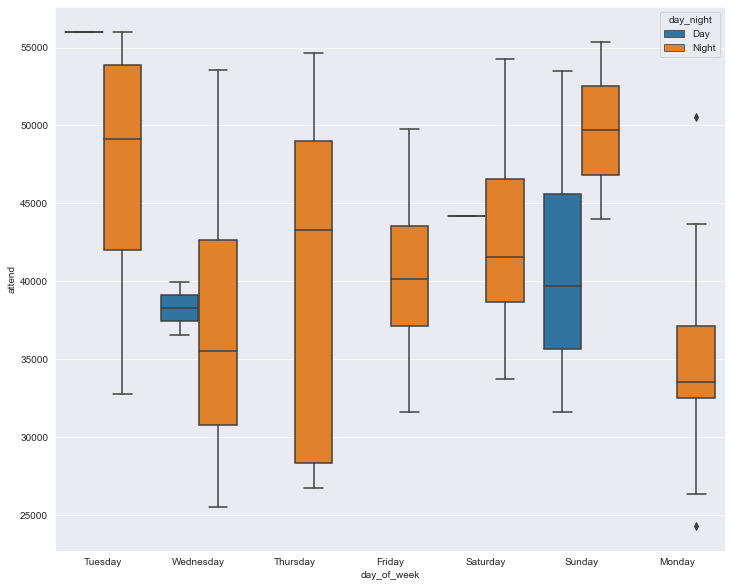

In [16]:
# boxplot of day or night games by day of the week
sns.boxplot(x = "day_of_week", y = "attend", hue = "day_night", data = dodgers)
plt.show()

In [17]:
dodgers.groupby(['day_of_week','day_night']).attend.describe()

count          mean           std      min       25%  \
day_of_week day_night                                                         
Friday      Night       13.0  40116.923077   4694.879400  31601.0  37133.00   
Monday      Night       12.0  34965.666667   7005.957949  24312.0  32553.75   
Saturday    Day          1.0  44217.000000           NaN  44217.0  44217.00   
            Night       12.0  42977.583333   6608.493893  33735.0  38677.50   
Sunday      Day         11.0  40921.000000   7057.652443  31607.0  35680.50   
            Night        2.0  49682.000000   8028.490394  44005.0  46843.50   
Thursday    Night        5.0  40407.400000  12411.591328  26773.0  28328.00   
Tuesday     Day          1.0  56000.000000           NaN  56000.0  56000.00   
            Night       12.0  47053.000000   8263.141478  32799.0  42009.50   
Wednesday   Day          2.0  38275.500000   2375.171678  36596.0  37435.75   
            Night       10.0  37447.100000   9574.760391  25509.0  30795.00   

                           50%       75%      max  
day_of_week day_night                              
Friday      Night      40167.0  43537.00  49763.0  
Monday      Night      33582.0  37162.50  50559.0  
Saturday    Day        44217.0  44217.00  44217.0  
            Night      41586.5  46558.75  54242.0  
Sunday      Day        39715.0  45624.00  53504.0  
            Night      49682.0  52520.50  55359.0  
Thursday    Night      43309.0  49006.00  54621.0  
Tuesday     Day        56000.0  56000.00  56000.0  
            Night      49107.0  53879.50  56000.0  
Wednesday   Day        38275.5  39115.25  39955.0  
            Night      35549.0  42663.75  53570.0

In [18]:
# explore promotions (hats, shirts, fireworks, bobbleheads)
dodgers.groupby(['cap','shirt','bobblehead','fireworks']).attend.describe()

count          mean          std      min  \
cap shirt bobblehead fireworks                                              
NO  NO    NO         NO          51.0  38201.078431  7437.222312  24312.0   
                     YES         14.0  41077.857143  5768.351782  31601.0   
          YES        NO          11.0  53144.636364  2887.153279  47077.0   
    YES   NO         NO           3.0  46643.666667  5295.079351  40619.0   
YES NO    NO         NO           2.0  38189.500000  6088.896493  33884.0   

                                     25%      50%       75%      max  
cap shirt bobblehead fireworks                                        
NO  NO    NO         NO         33423.00  37084.0  43401.50  56000.0  
                     YES        37255.25  40299.5  43789.00  53570.0  
          YES        NO         51984.50  54242.0  55151.50  56000.0  
    YES   NO         NO         44686.00  48753.0  49656.00  50559.0  
YES NO    NO         NO         36036.75  38189.5  40342.25  42495.0

In [19]:
dodgers.groupby(['day_of_week','cap','shirt','bobblehead','fireworks']).attend.describe()

count          mean          std  \
day_of_week cap shirt bobblehead fireworks                                     
Friday      NO  NO    NO         YES         13.0  40116.923077  4694.879400   
Monday      NO  NO    NO         NO          11.0  33548.090909  5240.812331   
                YES   NO         NO           1.0  50559.000000          NaN   
Saturday    NO  NO    NO         NO          11.0  41062.909091  4392.208248   
                      YES        NO           2.0  54128.000000   161.220346   
Sunday      NO  NO    NO         NO          10.0  40288.800000  6990.478982   
                      YES        NO           1.0  55359.000000          NaN   
                YES   NO         NO           1.0  48753.000000          NaN   
            YES NO    NO         NO           1.0  42495.000000          NaN   
Thursday    NO  NO    NO         NO           3.0  32803.333333  9131.335079   
                      YES        NO           2.0  51813.500000  3970.404576   
Tuesday     NO  NO    NO         NO           5.0  45756.800000  9308.257071   
                      YES        NO           6.0  52891.500000  3370.480841   
                YES   NO         NO           1.0  40619.000000          NaN   
            YES NO    NO         NO           1.0  33884.000000          NaN   
Wednesday   NO  NO    NO         NO          11.0  36132.000000  7437.244046   
                                 YES          1.0  53570.000000          NaN   

                                                min       25%      50%  \
day_of_week cap shirt bobblehead fireworks                               
Friday      NO  NO    NO         YES        31601.0  37133.00  40167.0   
Monday      NO  NO    NO         NO         24312.0  32448.50  33540.0   
                YES   NO         NO         50559.0  50559.00  50559.0   
Saturday    NO  NO    NO         NO         33735.0  37972.00  40724.0   
                      YES        NO         54014.0  54071.00  54128.0   
Sunday      NO  NO    NO         NO         31607.0  35643.75  39037.0   
                      YES        NO         55359.0  55359.00  55359.0   
                YES   NO         NO         48753.0  48753.00  48753.0   
            YES NO    NO         NO         42495.0  42495.00  42495.0   
Thursday    NO  NO    NO         NO         26773.0  27550.50  28328.0   
                      YES        NO         49006.0  50409.75  51813.5   
Tuesday     NO  NO    NO         NO         32799.0  42473.00  44014.0   
                      YES        NO         47077.0  51560.75  53928.0   
                YES   NO         NO         40619.0  40619.00  40619.0   
            YES NO    NO         NO         33884.0  33884.00  33884.0   
Wednesday   NO  NO    NO         NO         25509.0  31861.00  36596.0   
                                 YES        53570.0  53570.00  53570.0   

                                                 75%      max  
day_of_week cap shirt bobblehead fireworks                     
Friday      NO  NO    NO         YES        43537.00  49763.0  
Monday      NO  NO    NO         NO         35685.50  43713.0  
                YES   NO         NO         50559.00  50559.0  
Saturday    NO  NO    NO         NO         44713.50  46588.0  
                      YES        NO         54185.00  54242.0  
Sunday      NO  NO    NO         NO         43480.50  53504.0  
                      YES        NO         55359.00  55359.0  
                YES   NO         NO         48753.00  48753.0  
            YES NO    NO         NO         42495.00  42495.0  
Thursday    NO  NO    NO         NO         35818.50  43309.0  
                      YES        NO         53217.25  54621.0  
Tuesday     NO  NO    NO         NO         53498.00  56000.0  
                      YES        NO         55215.25  56000.0  
                YES   NO         NO         40619.00  40619.0  
            YES NO    NO         NO         33884.00  33884.0  
Wednesday   NO  NO    NO    

In [20]:
dodgers.groupby(['month','cap','shirt','bobblehead','fireworks']).attend.describe()

count          mean           std  \
month cap shirt bobblehead fireworks                                      
APR   NO  NO    NO         NO           8.0  36962.500000  11069.163435   
                           YES          2.0  38204.000000   9338.052152   
                YES        NO           1.0  54242.000000           NaN   
          YES   NO         NO           1.0  48753.000000           NaN   
AUG   NO  NO    NO         NO           8.0  39021.125000   4195.420035   
                           YES          3.0  40321.333333   2991.112892   
                YES        NO           3.0  55215.000000    709.063467   
      YES NO    NO         NO           1.0  42495.000000           NaN   
JUL   NO  NO    NO         NO           6.0  38846.500000   7891.564781   
                           YES          2.0  48721.500000   6856.814457   
                YES        NO           3.0  54068.333333   1264.375867   
      YES NO    NO         NO           1.0  33884.000000           NaN   
JUN   NO  NO    NO         NO           4.0  46606.250000   4651.991858   
                           YES          2.0  45097.500000   6598.013375   
                YES        NO           2.0  52142.500000   4435.680838   
          YES   NO         NO           1.0  50559.000000           NaN   
MAY   NO  NO    NO         NO          13.0  35479.153846   7453.058945   
                           YES          3.0  37593.333333   2889.642942   
                YES        NO           2.0  49107.000000   2870.853532   
OCT   NO  NO    NO         NO           3.0  36703.666667   5000.193030   
SEP   NO  NO    NO         NO           9.0  38838.000000   5941.356537   
                           YES          2.0  38650.000000   2145.361974   
          YES   NO         NO           1.0  40619.000000           NaN   

                                          min       25%      50%       75%  \
month cap shirt bobblehead fireworks                                         
APR   NO  NO    NO         NO         26345.0  27840.00  34044.0  44647.75   
                           YES        31601.0  34902.50  38204.0  41505.50   
                YES        NO         54242.0  54242.00  54242.0  54242.00   
          YES   NO         NO         48753.0  48753.00  48753.0  48753.00   
AUG   NO  NO    NO         NO         32659.0  36807.50  38628.5  40689.75   
                           YES        37622.0  38713.50  39805.0  41671.00   
                YES        NO         54621.0  54822.50  55024.0  55512.00   
      YES NO    NO         NO         42495.0  42495.00  42495.0  42495.00   
JUL   NO  NO    NO         NO         32238.0  33508.25  37104.0  39895.00   
                           YES        43873.0  46297.25  48721.5  51145.75   
                YES        NO         52832.0  53423.00  54014.0  54686.50   
      YES NO    NO         NO         33884.0  33884.00  33884.0  33884.00   
JUN   NO  NO    NO         NO         43494.0  44036.25  44713.5  47283.50   
                           YES        40432.0  42764.75  45097.5  47430.25   
                YES        NO         49006.0  50574.25  52142.5  53710.75   
          YES   NO         NO         50559.0  50559.00  50559.0  50559.00   
MAY   NO  NO    NO         NO         24312.0  32799.00  33993.0  39383.00   
                           YES        35591.0  35937.00  36283.0  38594.50   
                YES        NO         47077.0  48092.00  49107.0  50122.00   
OCT   NO  NO    NO         NO         33624.0  33819.00  34014.0  38243.50   
SEP   NO  NO    NO         NO         31607.0  35607.00  35992.0  42449.00   
                           YES        37133.0  37891.50  38650.0  39408.50   
          YES   NO         NO         40619.0  40619.00  40619.0  40619.00   

                                          max  
month cap shirt bobblehead fireworks           
APR   NO  NO    NO         NO         56000.0  
                           YES        44807.0  
                YES

In [21]:
# cap giveaways actually draw less fans, so games with fireworks, bobbleheads, and shirts 
# will be further explored by with days of the week
dodgers.groupby(['day_of_week','bobblehead']).attend.describe()
# no boble head games occurred on a Monday, Wednesday, or Friday, Tuesday had the most occurences

count          mean          std      min       25%  \
day_of_week bobblehead                                                        
Friday      NO           13.0  40116.923077  4694.879400  31601.0  37133.00   
Monday      NO           12.0  34965.666667  7005.957949  24312.0  32553.75   
Saturday    NO           11.0  41062.909091  4392.208248  33735.0  37972.00   
            YES           2.0  54128.000000   161.220346  54014.0  54071.00   
Sunday      NO           12.0  41178.000000  6787.843733  31607.0  35717.25   
            YES           1.0  55359.000000          NaN  55359.0  55359.00   
Thursday    NO            3.0  32803.333333  9131.335079  26773.0  27550.50   
            YES           2.0  51813.500000  3970.404576  49006.0  50409.75   
Tuesday     NO            7.0  43326.714286  8875.037572  32799.0  37251.50   
            YES           6.0  52891.500000  3370.480841  47077.0  51560.75   
Wednesday   NO           12.0  37585.166667  8696.234889  25509.0  32927.00   

                            50%       75%      max  
day_of_week bobblehead                              
Friday      NO          40167.0  43537.00  49763.0  
Monday      NO          33582.0  37162.50  50559.0  
Saturday    NO          40724.0  44713.50  46588.0  
            YES         54128.0  54185.00  54242.0  
Sunday      NO          40811.0  45192.00  53504.0  
            YES         55359.0  55359.00  55359.0  
Thursday    NO          28328.0  35818.50  43309.0  
            YES         51813.5  53217.25  54621.0  
Tuesday     NO          42473.0  48756.00  56000.0  
            YES         53928.0  55215.25  56000.0  
Wednesday   NO          36840.0  41003.25  53570.0

In [22]:
# look at games with bobblehead giveaways
dodgers[dodgers['bobblehead'].str.contains('YES')]

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,NO,NO,NO,YES
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,NO,NO,NO,YES
39,JUL,1,55359,Sunday,Mets,75,Clear,Night,NO,NO,NO,YES
44,JUL,14,54014,Saturday,Padres,75,Clear,Night,NO,NO,NO,YES
50,JUL,31,52832,Tuesday,Snakes,75,Cloudy,Night,NO,NO,NO,YES
56,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,NO,NO,NO,YES
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,NO,NO,NO,YES


In [23]:
dodgers.groupby(['day_of_week','shirt']).attend.describe()

count          mean           std      min       25%  \
day_of_week shirt                                                         
Friday      NO      13.0  40116.923077   4694.879400  31601.0  37133.00   
Monday      NO      11.0  33548.090909   5240.812331  24312.0  32448.50   
            YES      1.0  50559.000000           NaN  50559.0  50559.00   
Saturday    NO      13.0  43072.923077   6336.482298  33735.0  39383.00   
Sunday      NO      12.0  41728.500000   7668.747563  31607.0  35717.25   
            YES      1.0  48753.000000           NaN  48753.0  48753.00   
Thursday    NO       5.0  40407.400000  12411.591328  26773.0  28328.00   
Tuesday     NO      12.0  48334.750000   8366.667819  32799.0  43628.75   
            YES      1.0  40619.000000           NaN  40619.0  40619.00   
Wednesday   NO      12.0  37585.166667   8696.234889  25509.0  32927.00   

                       50%       75%      max  
day_of_week shirt                              
Friday      NO     40167.0  43537.00  49763.0  
Monday      NO     33540.0  35685.50  43713.0  
            YES    50559.0  50559.00  50559.0  
Saturday    NO     42449.0  46549.00  54242.0  
Sunday      NO     40811.0  45284.75  55359.0  
            YES    48753.0  48753.00  48753.0  
Thursday    NO     43309.0  49006.00  54621.0  
Tuesday     NO     51984.5  55087.75  56000.0  
            YES    40619.0  40619.00  40619.0  
Wednesday   NO     36840.0  41003.25  53570.0

In [24]:
# look at games with shirt giveaways
dodgers[dodgers['shirt'].str.contains('YES')]

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
11,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO
69,SEP,4,40619,Tuesday,Padres,78,Clear,Night,NO,YES,NO,NO


In [25]:
dodgers.groupby(['day_of_week','fireworks']).attend.describe()
# fireworks only occur on Friday nights and they happen after ever Friday night game, 
# with the exception of one Wednesday game that was on July 4th

count          mean           std      min       25%  \
day_of_week fireworks                                                         
Friday      YES         13.0  40116.923077   4694.879400  31601.0  37133.00   
Monday      NO          12.0  34965.666667   7005.957949  24312.0  32553.75   
Saturday    NO          13.0  43072.923077   6336.482298  33735.0  39383.00   
Sunday      NO          13.0  42268.846154   7596.350657  31607.0  35754.00   
Thursday    NO           5.0  40407.400000  12411.591328  26773.0  28328.00   
Tuesday     NO          13.0  47741.230769   8291.390044  32799.0  42473.00   
Wednesday   NO          11.0  36132.000000   7437.244046  25509.0  31861.00   
            YES          1.0  53570.000000           NaN  53570.0  53570.00   

                           50%      75%      max  
day_of_week fireworks                             
Friday      YES        40167.0  43537.0  49763.0  
Monday      NO         33582.0  37162.5  50559.0  
Saturday    NO         42449.0  46549.0  54242.0  
Sunday      NO         41907.0  48753.0  55359.0  
Thursday    NO         43309.0  49006.0  54621.0  
Tuesday     NO         51137.0  55024.0  56000.0  
Wednesday   NO         36596.0  40064.0  50560.0  
            YES        53570.0  53570.0  53570.0

In [26]:
# convert objects to integers for correlation and future testing
cleanup_nums = {"month":     {'APR': 4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10},
                "day_of_week": {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5,
                                 'Friday':6, 'Saturday':7},
                "opponent": {'Pirates':1, 'Padres':2, 'Braves':3, 'Nationals':4, 'Giants':5, 'Rockies':6, 'Snakes':7,
                             'Cardinals':8, 'Astros':9, 'Brewers':10, 'Angels':11, 'White Sox':12, 'Mets':13,
                             'Reds':14, 'Phillies':15, 'Cubs':16, 'Marlins':17},
                "skies": {'Clear ':0, 'Cloudy':1},
                "day_night": {'Day':0, 'Night':1},
                "cap": {'NO':0, 'YES':1},
                "shirt": {'NO':0, 'YES':1},
                "fireworks": {'NO':0, 'YES':1},
                "bobblehead": {'NO':0, 'YES':1}}

# copy dataframe
dodgers_num = dodgers.copy()

# replace objects with integers
dodgers_num.replace(cleanup_nums, inplace=True)
dodgers_num.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,4,10,56000,3,1,67,0,0,0,0,0,0
1,4,11,29729,4,1,58,1,1,0,0,0,0
2,4,12,28328,5,1,57,1,1,0,0,0,0
3,4,13,31601,6,2,54,1,1,0,0,1,0
4,4,14,46549,7,2,57,1,1,0,0,0,0


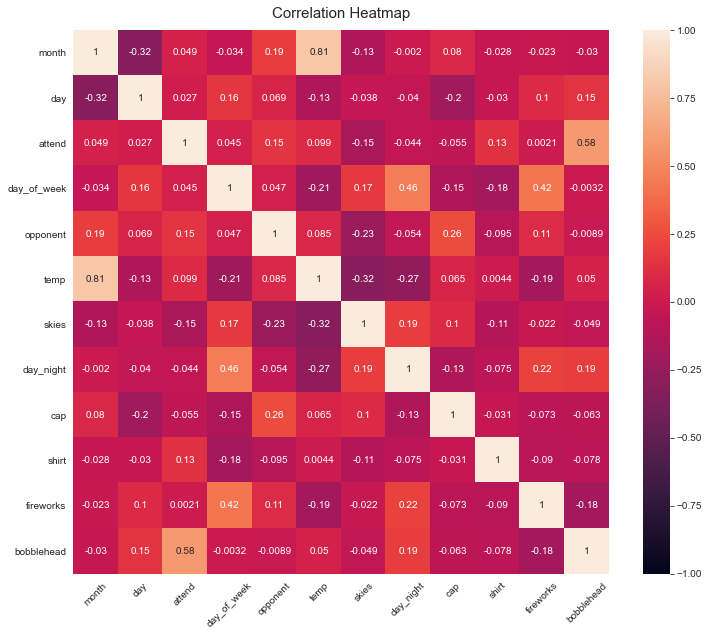

In [27]:
# plot correlation heatmap
sns.heatmap(dodgers_num.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Heatmap', fontdict={'fontsize':15}, pad = 12)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.show()

In [28]:
# save dataframe to csv for model work in R
dodgers_num.to_csv (r'C:\Users\dougm\Desktop\dodgers_num.csv', index = False, header=True)